In [6]:
import Q3 
from util.preprocessing_util import preprocess
from util.keypoints_util     import orb_matching
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

# Analysis
How could we reduce the computational burden of this method? Assume that the only cause of registration error is a translation transformation (shifts of <20 pixels).

In [7]:
def evaluate_performance(im_ref,width,height,n_samples=1000,method='dummy'):
    """
    Analyze my method
    
    parameters
    ----------
        im_ref: matrix
            Name/ Path of the reference image
        width: int
            width of the subimages (number of pixels)
        height: int
            height of the subimages (number of pixels)
        n_sample: int
            Number of samble on which we analyse
    
    returns
    -------
        tp: int
            Number of well found transform
        dt: float
            Execution time
    """

    tp = 0 # True positive
    dt = 0 # Execution time

    for _ in range(n_samples):
        im1,im2,true_tx,true_ty = Q3.generate_images(im_ref,width=width,height=height)
        
        t0      = time.time()
        if   method=='dummy':
            T       = Q3.compute_transformation(im1,im2)
        elif method=='ORB':
        # The input arrays should have at least 4 corresponding point sets 
        # to calculate Homography in function 'cv::findHomography'
            kp1, des1, kp2, des2, matches, T = orb_matching(im1,im2,transform='affine')

        t1      = time.time()
        tx      = int(np.round(T[0,2],0))
        ty      = int(np.round(T[1,2],0))
        

        if true_tx==tx and true_ty==ty:
            tp += 1

        dt += t1-t0
    
    return tp,dt

Let's compute the time and complexity for multiple value of size

In [8]:
ref_filename = 'src\S2A_MSIL1C_20230312T042701_N0509_R133_T46QBL_20230312T062152.SAFE\GRANULE\L1C_T46QBL_A040313_20230312T043803\IMG_DATA\T46QBL_20230312T042701_B04.jp2'
im_ref = cv2.imread(ref_filename,-1)
im_ref = preprocess(im_ref)

n_samples = 100

In [9]:
tps_dummy = []
dts_dummy = []
sizes1 = [200,400,800,1200,1600,2000,2400,2600,3000,3500,4000]
for size in sizes1:
    tp,dt = evaluate_performance(im_ref,width=size,height=size,n_samples=n_samples,method='dummy')
    tps_dummy.append(tp)
    dts_dummy.append(dt/n_samples*1000)
    print('mAcc = %f   mean time = %f  tp= %d/%d     size=%d'%(tp/n_samples,dt/n_samples,tp,n_samples,size))

mAcc = 0.960000   mean time = 0.009124  tp= 96/100     size=200
mAcc = 1.000000   mean time = 0.009171  tp= 100/100     size=400
mAcc = 1.000000   mean time = 0.011652  tp= 100/100     size=800
mAcc = 1.000000   mean time = 0.018463  tp= 100/100     size=1200
mAcc = 1.000000   mean time = 0.022719  tp= 100/100     size=1600
mAcc = 1.000000   mean time = 0.029179  tp= 100/100     size=2000
mAcc = 1.000000   mean time = 0.040217  tp= 100/100     size=2400
mAcc = 1.000000   mean time = 0.048872  tp= 100/100     size=2600
mAcc = 1.000000   mean time = 0.060297  tp= 100/100     size=3000
mAcc = 1.000000   mean time = 0.073811  tp= 100/100     size=3500
mAcc = 1.000000   mean time = 0.090332  tp= 100/100     size=4000


In [10]:
tps_ORB = []
dts_ORB = []
sizes2 = [800,1200,1600,2000,2400,2600,3000,3500,4000]
for size in sizes2:
    tp,dt = evaluate_performance(im_ref,width=size,height=size,n_samples=n_samples,method='ORB')
    tps_ORB.append(tp)
    dts_ORB.append(dt/n_samples*1000)
    print('mAcc = %f   mean time = %f  tp= %d/%d     size=%d'%(tp/n_samples,dt/n_samples,tp,n_samples,size))

mAcc = 0.970000   mean time = 0.029534  tp= 97/100     size=800
mAcc = 0.950000   mean time = 0.032867  tp= 95/100     size=1200
mAcc = 0.990000   mean time = 0.051285  tp= 99/100     size=1600
mAcc = 0.980000   mean time = 0.076655  tp= 98/100     size=2000
mAcc = 0.940000   mean time = 0.114153  tp= 94/100     size=2400
mAcc = 1.000000   mean time = 0.110022  tp= 100/100     size=2600
mAcc = 0.990000   mean time = 0.130936  tp= 99/100     size=3000
mAcc = 0.980000   mean time = 0.169686  tp= 98/100     size=3500
mAcc = 0.990000   mean time = 0.258511  tp= 99/100     size=4000


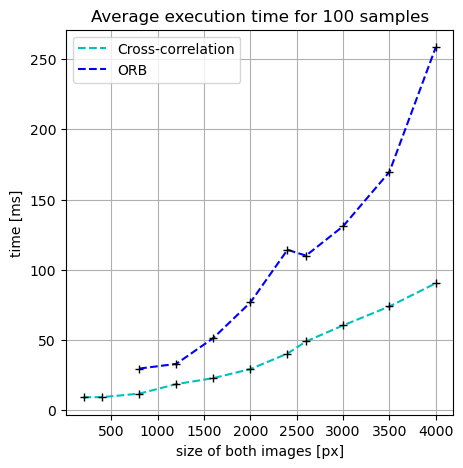

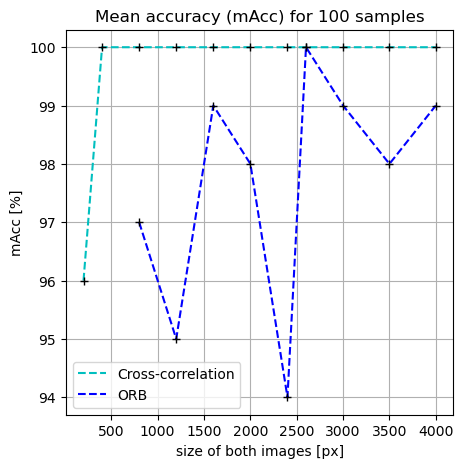

In [11]:
# Average execution time
plt.figure(figsize=(5,5))
plt.plot(sizes1,dts_dummy,'--c',label='Cross-correlation')
plt.plot(sizes1,dts_dummy,'k+')
plt.plot(sizes2,dts_ORB,'--b',label='ORB')
plt.plot(sizes2,dts_ORB,'+k')
plt.legend()
plt.xlabel('size of both images [px]')
plt.ylabel('time [ms]')
plt.title('Average execution time for %d samples'%n_samples)
plt.grid()
plt.show()

# Mean accuracy
plt.figure(figsize=(5,5))
plt.plot(sizes1,tps_dummy,'--c',label='Cross-correlation')
plt.plot(sizes1,tps_dummy,'k+')
plt.plot(sizes2,tps_ORB,'--b',label='ORB')
plt.plot(sizes2,tps_ORB,'+k')
plt.legend()
plt.xlabel('size of both images [px]')
plt.ylabel('mAcc [%]')
plt.title('Mean accuracy (mAcc) for %d samples'%n_samples)
plt.grid()

plt.show()